## Predicting Car prices using Linear Modeling (Linear Regression, Ridge, Lasso and Elastic Net)

Importing important libraries and filtering warnings

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Reading the csv file into a Pandas DataFrame, then replacing spaces to underscore, and uppercases to lowercase in columns names

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.columns = df.columns.str.replace(' ','_')
df.columns= df.columns.str.strip().str.lower()
df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

As we can see, the dataframe does not have many rows (205) and have a large number of columns, compared to the number of observations (26, more than 10% of observations).

Next, the EDA function was defined and used into the dataframe.

In [4]:
# Defining EDA function
def EDA (df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    
    colunas = sorted(df.columns.tolist(), key=str.lower, reverse=False)
    eda_df['Amount_Unique'] = filtered_result = list(map(lambda x: len(df[x].unique().tolist()), colunas))
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    return pd.DataFrame(eda_df)

In [5]:
EDA(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Median,Max,Min,STD
aspiration,0,0.0,object,205,2,NaN,NaN,turbo,std,NaN
boreratio,0,0.0,float64,205,38,3.33,3.31,3.94,2.54,0.27
car_id,0,0.0,int64,205,205,103.00,103.00,205,1,59.32
carbody,0,0.0,object,205,5,NaN,NaN,wagon,convertible,NaN
carheight,0,0.0,float64,205,49,53.72,54.10,59.8,47.8,2.44
carlength,0,0.0,float64,205,75,174.05,173.20,208.1,141.1,12.34
carname,0,0.0,object,205,147,NaN,NaN,vw rabbit,Nissan versa,NaN
carwidth,0,0.0,float64,205,44,65.91,65.50,72.3,60.3,2.15
citympg,0,0.0,int64,205,29,25.22,24.00,49,13,6.54
compressionratio,0,0.0,float64,205,32,10.14,9.00,23.0,7.0,3.97


There are no missing values in any column. 
The car ID column can be droped, as it is a unique value per car.
The number of cylinders is a string, it needs some replacement to be treated as numerical.

In [6]:
df.drop('car_id',axis=1,inplace=True)

In [7]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [8]:
df['cylindernumber']=df['cylindernumber'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

After the initial data treatment, a correlation heatmap was ploted to check for correlation between features and the car price

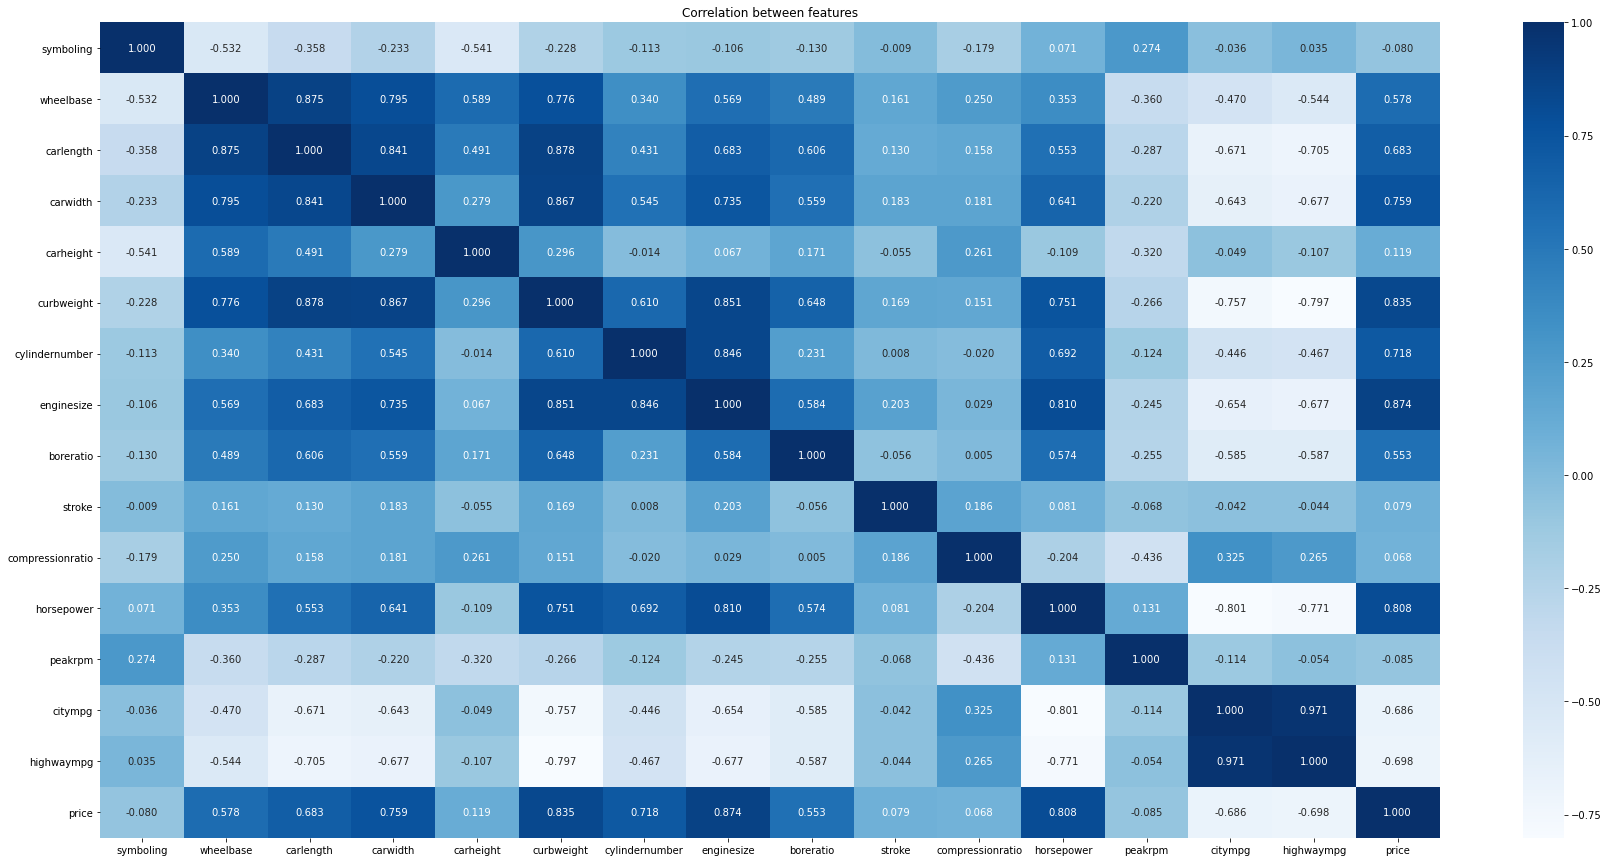

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30,15))

sns.heatmap(df.corr(),
            annot = True,
            fmt = '.3f',
            cmap='Blues')
plt.title('Correlation between features')
plt.show()

It is possible to see that the car price has a strong correlation (correlation > 0.8) with engine size, curb weight and horsepower. 
A moderate correlation (0.5 < correlation < 0.8) with wheel base, car lenght, car width, cylinder number bore ratio and fuel consumption (negative correlation).
A weak correlation with car height, stroke, compression ratio and peak rpm (negative correlation).

With this data, we can assume that Linear Models can be effective in predict car prices.

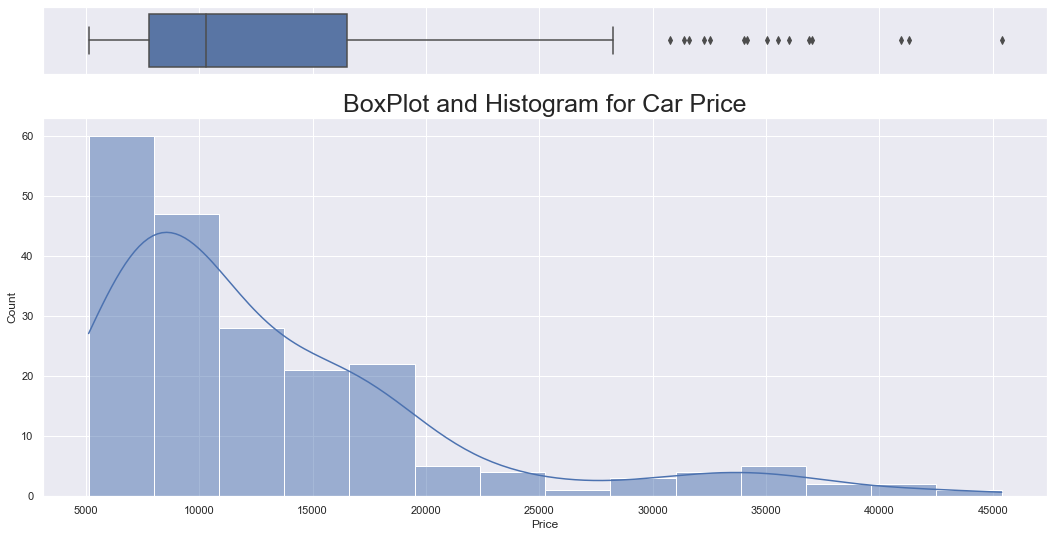

In [10]:
sns.set(style="darkgrid")
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,9
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["price"], ax=ax_box)
sns.histplot(data=df, x="price", ax=ax_hist,kde=True)
plt.title('BoxPlot and Histogram for Car Price',fontsize=25)
plt.xlabel('Price')
plt.ylabel('Count')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

It is possible to see that the distribution of the prices is not Normal. It has some outliers on the right, that's why the mean is greater than the median for the target variable.
No outliers will be removed because of the few data in this DataSet. 

So, the next step is to move on to Encoding, Preprocessing and Model Train.

In [11]:
y = df["price"]
X = df.drop("price", axis=1)
X = X.drop('carname', axis=1)

Car name removed because there is a relation of car names per car close to 1.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [13]:
EDA(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Median,Max,Min,STD
aspiration,0,0.0,object,205,2,NaN,NaN,turbo,std,NaN
boreratio,0,0.0,float64,205,38,3.33,3.31,3.94,2.54,0.27
carbody,0,0.0,object,205,5,NaN,NaN,wagon,convertible,NaN
carheight,0,0.0,float64,205,49,53.72,54.10,59.8,47.8,2.44
carlength,0,0.0,float64,205,75,174.05,173.20,208.1,141.1,12.34
carname,0,0.0,object,205,147,NaN,NaN,vw rabbit,Nissan versa,NaN
carwidth,0,0.0,float64,205,44,65.91,65.50,72.3,60.3,2.15
citympg,0,0.0,int64,205,29,25.22,24.00,49,13,6.54
compressionratio,0,0.0,float64,205,32,10.14,9.00,23.0,7.0,3.97
curbweight,0,0.0,int64,205,171,2555.57,2414.00,4066,1488,520.68


Encoding

In [14]:
import category_encoders as ce
encoder = ce.OneHotEncoder()
encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_encoded)
X_train_norm = scaler.transform(X_train_encoded)
X_test_norm = scaler.transform(X_test_encoded)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Fitting a Linear Regression

In [17]:
reg = LinearRegression().fit(X_train_norm, y_train)

y_pred = reg.predict(X_test_norm)

print('Score train set:', reg.score(X_train_norm, y_train))
print('Score test set:', reg.score(X_test_norm, y_test))
print("MAE test:", mean_absolute_error(y_test, y_pred))
print("RMSE test:",(mean_squared_error(y_test, y_pred))**0.5)

Score train set: 0.920976698495318
Score test set: 0.8688312395817936
MAE test: 2308.6088227531077
RMSE test: 3466.046862404725


There is a difference of more than 5% between score for train set and score for test set, which can indicate that the model is overfitted. 
So, to check if it is possible to improve the model, a Lasso, a Ridge and a Elastic Net models were fitted and tested.

First, a Lasso regularization model for different alpha values, between 0.1 and 100

In [18]:
alphas=[]
score_train=[]
score_test=[]
MAE=[]
RMSE=[]

for i in np.arange(0.1,100.1,5):
    lasso = Lasso(alpha=i).fit(X_train_norm, y_train)
    y_pred = lasso.predict(X_test_norm)
    alphas.append(i)
    score_train.append(lasso.score(X_train_norm, y_train))
    score_test.append(lasso.score(X_test_norm, y_test))
    MAE.append(mean_absolute_error(y_test, y_pred))
    RMSE.append((mean_squared_error(y_test, y_pred))**0.5)

result=pd.DataFrame()
result['alphas']=pd.Series(alphas)
result['score_train']=score_train
result['score_test']=score_test
result['MAE']=MAE
result['RMSE']=RMSE
result.sort_values(by='RMSE',ascending=True).head()

,alphas,score_train,score_test,MAE,RMSE
13,65.1,0.903494,0.898346,2064.727420,3051.277469
11,55.1,0.905463,0.898335,2077.879934,3051.441328
12,60.1,0.904527,0.898241,2071.545282,3052.857731
10,50.1,0.906433,0.898203,2096.630537,3053.414919
14,70.1,0.902366,0.898034,2067.151912,3055.951755


As we can see, the difference between the scores for test and train set have decreased to less than 1%, reducing the overfitting.
The score for test set has increased 3% and the error (mean abosulute and root mean squared error) has decreased.

Next, a Ridge regularization model.

In [19]:
alphas=[]
score_train=[]
score_test=[]
MAE=[]
RMSE=[]

for i in np.arange(0.1,100.1,5):
    ridge = Ridge(alpha=i).fit(X_train_norm, y_train)
    y_pred = ridge.predict(X_test_norm)
    alphas.append(i)
    score_train.append(lasso.score(X_train_norm, y_train))
    score_test.append(lasso.score(X_test_norm, y_test))
    MAE.append(mean_absolute_error(y_test, y_pred))
    RMSE.append((mean_squared_error(y_test, y_pred))**0.5)

result=pd.DataFrame()
result['alphas']=pd.Series(alphas)
result['score_train']=score_train
result['score_test']=score_test
result['MAE']=MAE
result['RMSE']=RMSE
result.sort_values(by='RMSE',ascending=True).head()

,alphas,score_train,score_test,MAE,RMSE
1,5.1,0.895558,0.894748,2287.314386,3283.900807
2,10.1,0.895558,0.894748,2273.251457,3344.931883
0,0.1,0.895558,0.894748,2272.870904,3372.758531
3,15.1,0.895558,0.894748,2266.693639,3388.647942
4,20.1,0.895558,0.894748,2257.200305,3425.873047


As we can see, like in the Lasso Regularization model, the difference between the scores for test and train set have decreased to less than 1%, reducing the overfitting.
The score for test set has increased 3% too, and the error (mean abosulute and root mean squared error) has decreased.
But, the error for Lasso is less than the error for Ridge, making Lasso regularization more adequate for the problem so far.

Next, an Elastic Net regularization.

In [20]:
alphas=[]
l1_ratios=[]
score_train=[]
score_test=[]
MAE=[]
RMSE=[]

for i in np.arange(0.1,100.1,5):
    for j in np.arange(0,1.1,0.1):
    
        en = ElasticNet(alpha=i,l1_ratio=j).fit(X_train_norm, y_train)
        y_pred = en.predict(X_test_norm)
        alphas.append(i)
        l1_ratios.append(j)
        score_train.append(lasso.score(X_train_norm, y_train))
        score_test.append(lasso.score(X_test_norm, y_test))
        MAE.append(mean_absolute_error(y_test, y_pred))
        RMSE.append((mean_squared_error(y_test, y_pred))**0.5)

result=pd.DataFrame()
result['alphas']=pd.Series(alphas)
result['l1_ratio']=l1_ratios
result['score_train']=score_train
result['score_test']=score_test
result['MAE']=MAE
result['RMSE']=RMSE
result.sort_values(by='RMSE',ascending=True).head()

,alphas,l1_ratio,score_train,score_test,MAE,RMSE
153,65.1,1.0,0.895558,0.894748,2064.727420,3051.277469
131,55.1,1.0,0.895558,0.894748,2077.879934,3051.441328
142,60.1,1.0,0.895558,0.894748,2071.545282,3052.857731
120,50.1,1.0,0.895558,0.894748,2096.630537,3053.414919
164,70.1,1.0,0.895558,0.894748,2067.151912,3055.951755


#### The best configuration of alpha and l1 ratio for Elastic Net regularization is a l1 ratio of 1 (which means that the alpha for Ridge is 0), and total alpha of 65.1.
#### This is the same configuration for the Lasso Regularization Model, what shows that the best model for this car price prediction is a Linear Model with Lasso Regularization, using a Alpha (or Lambda) of 65.1
#### The scores for train and test set are similar, with a difference of less then 1%, which indicates no overfitting.
#### The RMSE was reduced from 3466 to 3051, showing the improvement of the model.

# Conclusion:

Both Lasso and Ridge Regularizations reduced the error, increased the score for test set and reduced the overfitting when compared with Linear Model.
Lasso had a greater result than Ridge, and the Elastic Net best model removed the Ridge coefficient from the model, using just the Lasso.

It is possible to predict Car Prices with a score of 0.896 and a Root Mean Squared Error of 3051.